In [1]:
# Problem Statement:
Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.

SyntaxError: invalid syntax (<ipython-input-1-316b80ffec60>, line 2)

By looking at the problem statement we can understand that "This is a classification problem"

# Hypothesis Generation
1. Clients with high income will have higher chances of paying next premium
2. Clients with high dafault rate has higher chances of the not paying next premium
3. Clients with low income has higher chances of not paying next premium
4. Clients with medium income has higher chances of not paying premium if premium cost high
5. Clients with higher age has higher chances of not paying premium

In [2]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# It gives the directory
import os
os.getcwd()

'C:\\Users\\dell'

In [4]:
# To change the directory of the system
os.chdir('C:\\Users\\dell\\Downloads')

In [5]:
os.getcwd()

'C:\\Users\\dell\\Downloads'

# Data Extraction

In [6]:
# Load the data sets
Test = pd.read_csv("test.csv")
Train = pd.read_csv("train.csv")

In [7]:
# Check the data weather it loaded or not
Test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [8]:
Train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 11 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_days                         34224 non-null int64
Income                              34224 non-null int64
Count_3-6_months_late               34193 non-null float64
Count_6-12_months_late              34193 non-null float64
Count_more_than_12_months_late      34193 non-null float64
application_underwriting_score      32901 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null object
residence_area_type                 34224 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 2.9+ MB


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
premium                             79853 non-null int64
target                              79853 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.9+ MB


If you observe carefully Test data set have only 11 columns where as Train data set has 13 columns. 
we will remove the primium column in Train data set 

In [11]:
Train = Train.drop(['premium'], axis =1)

# Exploratory Data Analysis

Steps in EDA:

1. Variable Identification
2. Univariate Analysis for Continious Variables
3. Univariate Analysis for Categorical Variables
4. Bivariate analysis for both Continious and categorical variables
5. Trating missing values
6. Outlier Treatment
7. Variable Transformation
    

In [12]:
# Variable Description


# id                               -  Unique ID of the policy
# perc_premium_paid_by_cash_credit -  Percentage of premium amount paid by cash or credit card
# age_in_days	                     -  Age in days of policy holder
# Income	                         -  Monthly Income of policy holder
# Count_3-6_months_late            -  No of premiums late by 3 to 6 months
# Count_6-12_months_late           -  No  of premiums late by 6 to 12 months
# Count_more_than_12_months_late   -  No of premiums late by more than 12 months
# application_underwriting_score   -  No applications under the score of 90 are insured
# no_of_premiums_paid              -  Total premiums paid on time till now
# sourcing_channel                 -  Sourcing channel for application
# residence_area_type              -  Area type of Residence (Urban/Rural)

# Vaiable Identification

In [13]:
# Identify continious and categorical variables
Train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

By above output we notice that sourcing_channel, residence_area_type are categorical variables

In [14]:
# Genrally data types int, float are continious variables but some times intiger varibles also in categorical in nature
Train["Count_3-6_months_late"].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [15]:
Train["Count_6-12_months_late"].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [16]:
Train["Count_more_than_12_months_late"].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [17]:
Train["no_of_premiums_paid"].value_counts()

8     7184
9     7158
10    6873
7     6623
11    6395
6     5635
12    5407
13    4752
5     4215
14    3988
15    3264
4     2907
16    2678
17    2148
18    1799
3     1746
19    1355
20    1134
21     838
2      726
22     713
23     503
24     386
25     305
26     241
27     186
28     152
29     119
30      91
31      61
32      51
33      43
34      38
35      31
36      23
37      14
38       8
42       7
40       6
41       6
39       5
47       5
44       4
43       3
45       3
56       3
48       3
50       3
51       3
58       2
52       2
53       2
54       2
59       1
55       1
49       1
60       1
Name: no_of_premiums_paid, dtype: int64

# In this section we noticed that below variables are categorical in nature

Count_3-6_months_late               
Count_6-12_months_late              
Count_more_than_12_months_late      
application_underwriting_score      
no_of_premiums_paid                   
sourcing_channel                     
residence_area_type                  
premium                               
targe

In [18]:
# If you notice age_in_days variable is in days, lets transform it to years 

Train['age_in_days'] = Train["age_in_days"]/365


In [19]:
Test['age_in_days'] = Test["age_in_days"]/365

In [20]:
# Now rename 'age_in _days variable to Age'
Train = Train.rename(columns={"age_in_days": "Age"})

In [21]:
Test = Test.rename(columns={"age_in_days": "Age"})

# Univariate Analysis of Continious variables

In [22]:
Train[["perc_premium_paid_by_cash_credit","Age", "Income", "application_underwriting_score"]].describe()

,perc_premium_paid_by_cash_credit,Age,Income,application_underwriting_score
count,79853.000000,79853.000000,7.985300e+04,76879.000000
mean,0.314288,51.634786,2.088472e+05,99.067291
std,0.334915,14.270463,4.965826e+05,0.739799
min,0.000000,21.013699,2.403000e+04,91.900000
25%,0.034000,41.024658,1.080100e+05,98.810000
50%,0.167000,51.027397,1.665600e+05,99.210000
75%,0.538000,62.016438,2.520900e+05,99.540000
max,1.000000,103.019178,9.026260e+07,99.890000


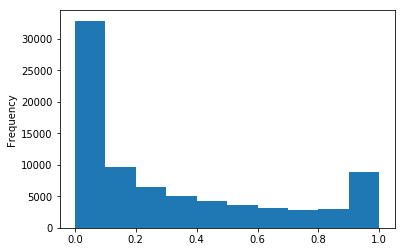

In [23]:
Train['perc_premium_paid_by_cash_credit'].plot.hist()

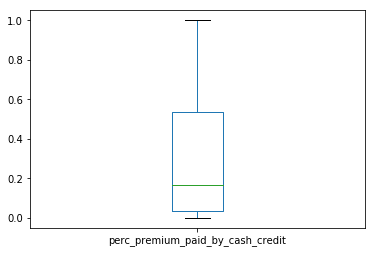

In [24]:
Train['perc_premium_paid_by_cash_credit'].plot.box()

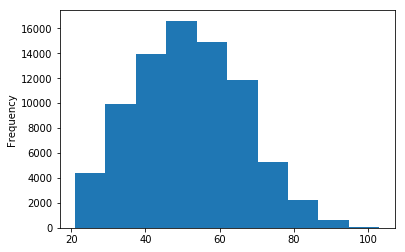

In [25]:
Train['Age'].plot.hist()

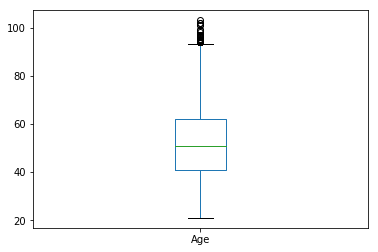

In [26]:
Train['Age'].plot.box()

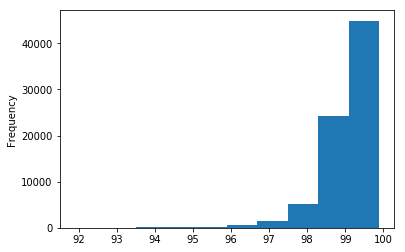

In [27]:
Train['application_underwriting_score'].plot.hist()

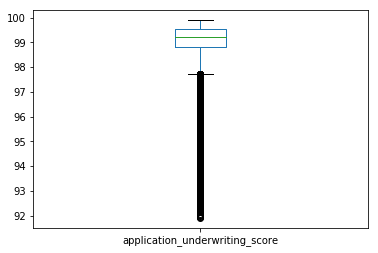

In [28]:
Train['application_underwriting_score'].plot.box()

# Note:
1. perc_premium_paid_by_cash_credit this variable has no outliers
2. Age distribution is normal above 90 is a outlier
3. application_underwriting_score is skewed left side and score below 98 is an outlier

# Univariate Analysis for Categorical Variables


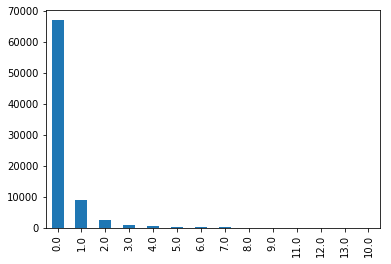

In [29]:
# Creating frequency tables and bar plots for the categorical variables
Train['Count_3-6_months_late'].value_counts().plot.bar()

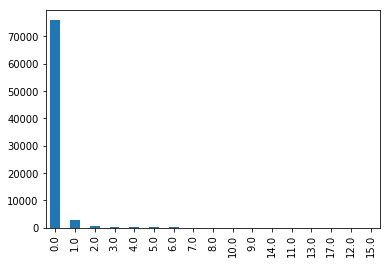

In [30]:
Train['Count_6-12_months_late'].value_counts().plot.bar()

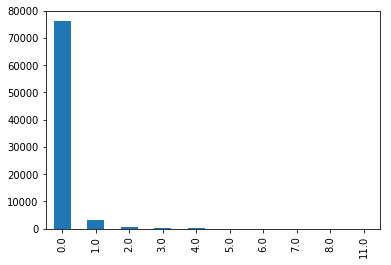

In [31]:
Train['Count_more_than_12_months_late'].value_counts().plot.bar()

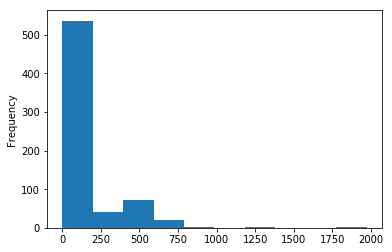

In [32]:
Train['application_underwriting_score'].value_counts().plot.hist()

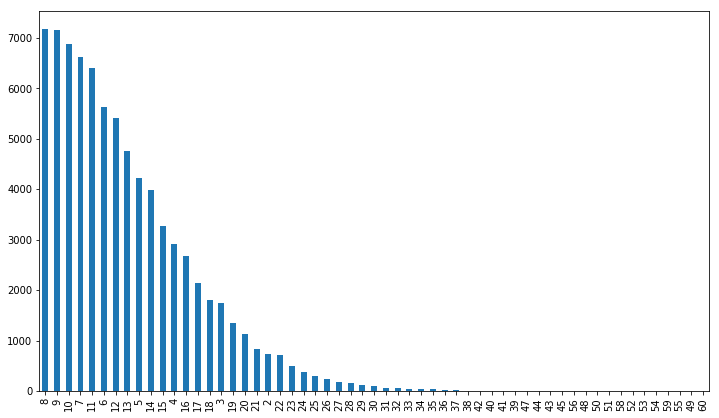

In [33]:
fig= plt.figure(figsize=(12,7))
Train['no_of_premiums_paid'].value_counts().plot.bar()

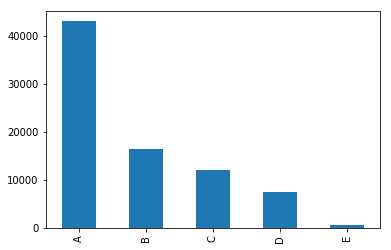

In [34]:
Train['sourcing_channel'].value_counts().plot.bar()

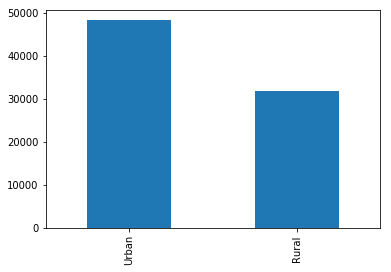

In [35]:
Train['residence_area_type'].value_counts().plot.bar()

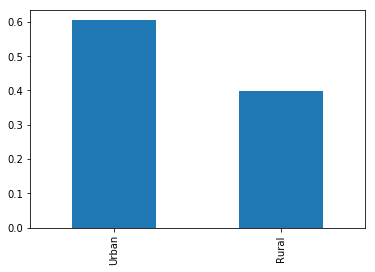

In [36]:
(Train['residence_area_type'].value_counts()/len(Train['residence_area_type'])).plot.bar()

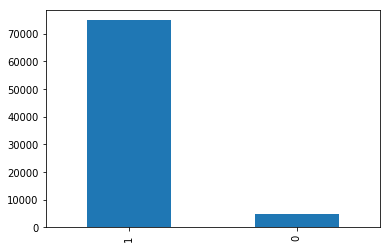

In [37]:
Train['target'].value_counts().plot.bar()

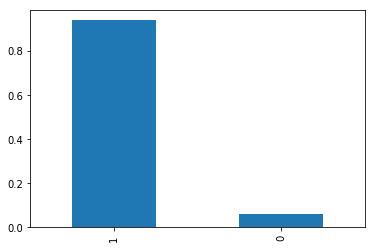

In [38]:
(Train['target'].value_counts()/len(Train['target'])).plot.bar()

# Note

1.( Count_3-6_months_late
Count_6-12_months_late
Count_more_than_12_months_late) most of the times these variables are 0, very rarely people misses to pay for3-12 months

2. no_of_premiums_paid' most number of clients paid 8 times then trend keep decresing 

3. sourcing_channel: 50% of the clients came from channel A

4. residence_area_type: Nearly 60% clients are from the urban area

5. Less then 10% clients are defaulters



# Continious - Continious Bivariate Analysis

In [39]:
Train[["perc_premium_paid_by_cash_credit","Age", "Income", "application_underwriting_score","target"]].corr()

,perc_premium_paid_by_cash_credit,Age,Income,application_underwriting_score,target
perc_premium_paid_by_cash_credit,1.000000,-0.259131,-0.031868,-0.142670,-0.240980
Age,-0.259131,1.000000,0.029308,0.049888,0.095103
Income,-0.031868,0.029308,1.000000,0.085746,0.016541
application_underwriting_score,-0.142670,0.049888,0.085746,1.000000,0.068715
target,-0.240980,0.095103,0.016541,0.068715,1.000000


In [40]:
Train.head()

,id,perc_premium_paid_by_cash_credit,Age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,33.035616,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,59.030137,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,48.030137,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,42.030137,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,86.027397,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


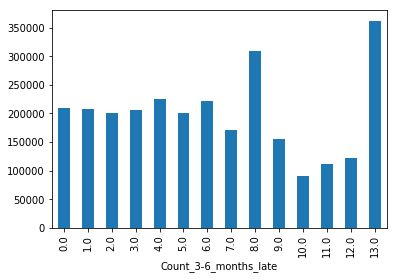

In [41]:
# Categorical - Continious Bivariate analysis

Train.groupby("Count_3-6_months_late")['Income'].mean().plot.bar()

# No clear trend but some clients has higher and higher default rate
#Some clients has low Income and higher default rate

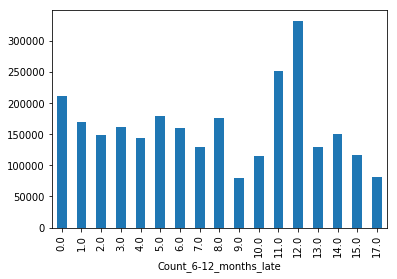

In [42]:
Train.groupby("Count_6-12_months_late")['Income'].mean().plot.bar()

# No clear trend but some clients has higher and higher default rate
#Some clients has low Income and higher default rate

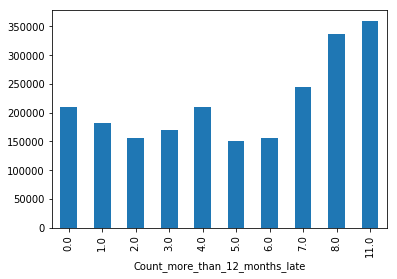

In [43]:
Train.groupby("Count_more_than_12_months_late")['Income'].mean().plot.bar()

# This attribute has some clear trend higher the Income Higher the default rate

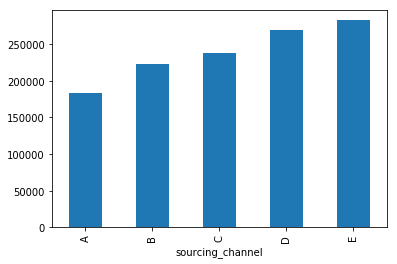

In [44]:
Train.groupby("sourcing_channel")['Income'].mean().plot.bar()

# Sorcing chanel E has high Income

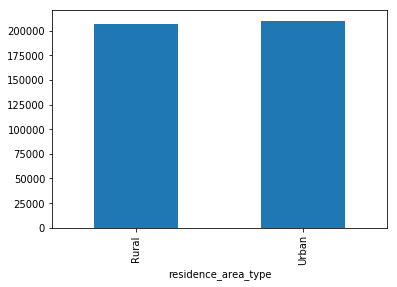

In [45]:
Train.groupby("residence_area_type")['Income'].mean().plot.bar()

# Incomes of Rural and Urban Clients has almost same.

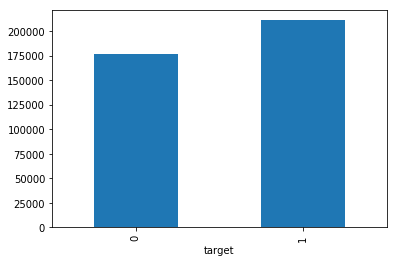

In [46]:
Train.groupby("target")['Income'].mean().plot.bar()

# Income less then 175k has higher chances of default rate 

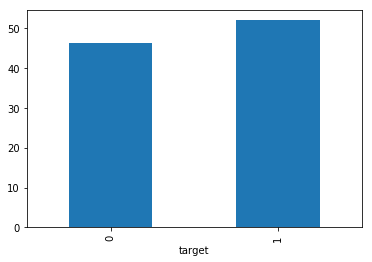

In [47]:
Train.groupby("target")['Age'].mean().plot.bar()

# Age less then 50 has higher chances of default rate

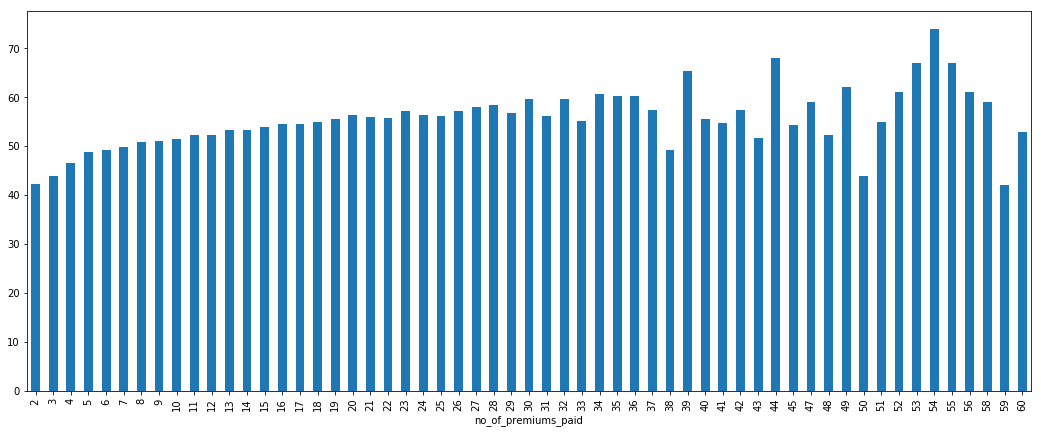

In [48]:
fig= plt.figure(figsize=(18,7))
Train.groupby("no_of_premiums_paid")['Age'].mean().plot.bar()

# Age increses no of times of premium pay increses

# Categorial - Categorial Bivariate Analysis

In [49]:
# Create 2-way tables
pd.crosstab(Train['sourcing_channel'], Train["target"])

# With this we can understad that sourcing chanel 'A' has low Income and high chances of default
# Overall percentage wise channel B has higher chances of default

target,0,1
sourcing_channel,,
A,2349,40785
B,1066,15446
C,903,11136
D,634,6925
E,46,563


In [50]:
pd.crosstab(Train['residence_area_type'], Train["target"])

#Rural clients has higher chances of default 

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


# Missing values treatment

In [51]:
Train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
Age                                    0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [52]:
# Replace the  application_underwriting_score with the mean
Train['application_underwriting_score'].fillna(99, inplace = True)

In [53]:
# Replace in Test set too
Test['application_underwriting_score'].fillna(99, inplace = True)

In [54]:
# Now drop null values in Train data set
Train = Train.dropna()

In [55]:
#In test data set replace with 0
Test.fillna(0,inplace = True)

In [56]:
# Now check for null values in both test and train data sets
Test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
Age                                 0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [57]:
Train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
Age                                 0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [58]:
# Drop un wanted columns
Train = Train.drop(['no_of_premiums_paid'], axis = 1)

In [59]:
Test = Test.drop(['no_of_premiums_paid'], axis = 1)

# Outlier Treatment

In [60]:
# replace  age above anything 90 with mean
import numpy as np
Train.loc[Train["Age"] >90, 'Age'] = np.mean(Train["Age"])

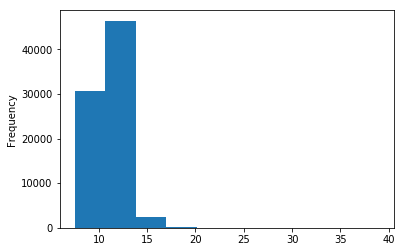

In [61]:
np.power(Train['Income'],1/5).plot.hist()

# Data Transformation

In [62]:
# We have convert categorical variables to numbers, editing manually takes lot of time so we will use LabelEncoder function
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
Train["sourcing_channel"] = number.fit_transform(Train["sourcing_channel"].astype('str'))
Test["sourcing_channel"] = number.fit_transform(Test["sourcing_channel"].astype("str"))


In [63]:
Train["residence_area_type"] = number.fit_transform(Train["residence_area_type"].astype('str'))
Test["residence_area_type"] = number.fit_transform(Test["residence_area_type"].astype("str"))

In [64]:
Train.corr()

,id,perc_premium_paid_by_cash_credit,Age,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,sourcing_channel,residence_area_type,target
id,1.000000,-0.004772,0.004306,-0.001816,-0.005660,-0.002125,0.003424,-0.002084,0.001364,0.001803,-0.005365
perc_premium_paid_by_cash_credit,-0.004772,1.000000,-0.255676,-0.031341,0.214470,0.214951,0.168125,-0.138657,0.082878,-0.002013,-0.237210
Age,0.004306,-0.255676,1.000000,0.030214,-0.057878,-0.072484,-0.059602,0.043666,-0.215420,0.000577,0.093163
Income,-0.001816,-0.031341,0.030214,1.000000,-0.001403,-0.017347,-0.012399,0.062699,0.059663,0.003470,0.015911
Count_3-6_months_late,-0.005660,0.214470,-0.057878,-0.001403,1.000000,0.204228,0.296085,-0.081463,0.058662,0.001592,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072484,-0.017347,0.204228,1.000000,0.266306,0.004382,0.027627,-0.000770,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059602,-0.012399,0.296085,0.266306,1.000000,-0.031140,0.029198,-0.001178,-0.240385
application_underwriting_score,-0.002084,-0.138657,0.043666,0.062699,-0.081463,0.004382,-0.031140,1.000000,-0.046309,0.004807,0.068549
sourcing_channel,0.001364,0.082878,-0.215420,0.059663,0.058662,0.027627,0.029198,-0.046309,1.000000,-0.002055,-0.042296
residence_area_type,0.001803,-0.002013,0.000577,0.003470,0.001592,-0.000770,-0.001178,0.004807,-0.002055,1.000000,0.002238


# Model Building

In [65]:
# Drop un corelated variables to our target variable in both test and train data set
x_train = Train.drop(['target','Age', 'Income', 'application_underwriting_score','residence_area_type','sourcing_channel'], axis =1)

In [72]:
Test_1 = Test.drop(['Age', 'Income', 'application_underwriting_score','residence_area_type','sourcing_channel'], axis =1)

In [67]:
y_train = Train['target']

In [68]:
import sklearn

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model_1 = DecisionTreeClassifier()

In [71]:
# Training The data set 
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
# Create a new variable target in test set
Test["target"] = model_1.predict(Test_1)

In [75]:
# score of our model on train data set
model_1.score(x_train,y_train)

1.0

In [81]:
Test_2 = Test[["id", "target"]]

In [83]:
Test_2.set_index('id').head()

,target
id,
649,1
81136,1
70762,1
53935,1
15476,1


In [84]:
# Export our results
export = Test_2.to_csv('target.csv')